# Irradiation of Alder Creek sanidine

* Here we read in the results of a simulated irradiation of an Alder Creek sanidine type sample
* The production pathways are tracked 
* Data from this simulation is used to create: 
    * Figure 3

In [129]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd

"""
Plots
"""
mpl.rcParams['font.size'] = 14

In [130]:
import pandas as pd
import os 

"""
Part 1 - Read in Data
"""

'\nPart 1 - Read in Data\n'

In [107]:
df = pd.DataFrame(pd.read_csv(file_list[0], skiprows = 20))
df = df.set_axis(["Neutron_energy",
                    "tZ", "tA", 
                        "Z", "A", 
                    "Nuclide_energy", 
                     "time"], axis = 1, inplace = False)
for i in range(0, 18):
    data = pd.read_csv(file_list[i], skiprows = 20)
    df1 = pd.DataFrame(data)
    df1 = df1.set_axis(["Neutron_energy",
                    "tZ", "tA", 
                        "Z", "A", 
                    "Nuclide_energy", 
                     "time"], axis = 1, inplace = False)
    df = pd.concat([df, df1])

In [108]:
df.head()

,Neutron_energy,tZ,tA,Z,A,Nuclide_energy,time
0,1.70360,13,27,13,27,0.164554,0.285352
1,1.06658,8,16,8,16,0.299703,0.340795
2,1.16908,8,16,8,16,0.262413,0.321495
3,1.30746,8,16,8,16,0.288151,0.305287
4,1.38020,8,16,8,16,0.239210,0.316562


In [109]:
df = df.set_axis(["Neutron_energy",
                    "tZ", "tA", 
                        "Z", "A", 
                    "Nuclide_energy", 
                     "time"], axis = 1, inplace = False)

In [110]:
df.head()

,Neutron_energy,tZ,tA,Z,A,Nuclide_energy,time
0,1.70360,13,27,13,27,0.164554,0.285352
1,1.06658,8,16,8,16,0.299703,0.340795
2,1.16908,8,16,8,16,0.262413,0.321495
3,1.30746,8,16,8,16,0.288151,0.305287
4,1.38020,8,16,8,16,0.239210,0.316562


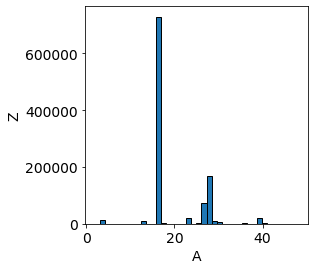

In [111]:

plt.figure(figsize = (4,4))
plt.hist(df['A'].values, 
        bins = 40, 
        edgecolor = 'k'); 

plt.xlabel('A'); 
plt.ylabel('Z'); 

In [112]:
n = np.unique(df['A'].values).shape[0]
n_secondaries = np.zeros(n)

for i in range(n):
    n_secondaries[i] = np.array(df[df['Z'] == i].shape[0])

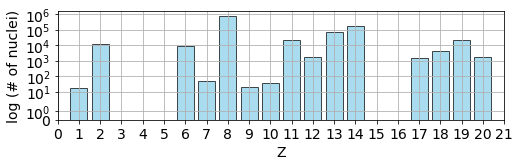

In [113]:
plt.figure(figsize = (8, 2))
for i in range(n):
    
    plt.bar(i,n_secondaries[i], 
           color = 'skyblue', alpha = 0.7, 
           edgecolor = 'k')
plt.yscale('symlog'); 
plt.xlim(0, 21)
plt.xlabel('Z')
plt.ylabel('log (# of nuclei)')
plt.locator_params(axis = 'x', nbins = 22)
plt.grid()

In [114]:
"""
Read Off

List of created Nuclei
"""
N_secondaries = np.array([42392,
  1957,60,1, 63, 3, 2326,
    25,68, 1, 5421, 46,  1, 1089,
    10,  14,   2,  33,   2, 612,
     5,33,11332, 284,1257,  7,951,
    83,353,622, 24, 89, 12205,
   148,  2,40, 391966, 191,912,
 94706,5376,2958, 3])

List_secondaries = ['$^{27}$Al', '$^{28}$Al', '$^{29}$Al', 
                    '$^{37}$Ar', '$^{38}$Ar', '$^{39}$Ar', 
                   '$^{40}$Ar', '$^{41}$Ar', '$^{11}$B',
                    '$^{12}$C', '$^{13}$C', '$^{14}$C', '$^{15}$C',
                   '$^{40}$Ca', '$^{41}$Ca', '$^{42}$Ca', '$^{43}$Ca',
                    '$^{44}$Ca',  '$^{48}$Ca', '$^{36}$Cl', 
                   '$^{38}$Cl' ,'$^{20}$F', '$^{39}$K',
                    '$^{40}$K', '$^{41}$K',
                    '$^{42}$K', '$^{25}$Mg', '$^{26}$Mg', 
                   '$^{27}$Mg', '$^{14}$N', '$^{15}$N', '$^{16}$N', 
                    '$^{23}$Na', '$^{24}$Na', '$^{22}$Ne', '$^{23}$Ne', 
                   '$^{16}$O', '$^{17}$O', '$^{18}$O', '$^{28}$Si',
                    '$^{29}$Si', '$^{30}$Si', '$^{31}$Si']

len(List_secondaries)

43

In [115]:
"""
Production of Argon
"""
argon = df[df['Z'] == 18]
"""
36Ar
"""
ar36 = argon[argon['A'] == 36]

"""
36Ar
"""
ar37 = argon[argon['A'] == 37]
"""
36Ar
"""
ar38 = argon[argon['A'] == 38]
"""
36Ar
"""
ar39 = argon[argon['A'] == 39]
"""
36Ar
"""
ar40 = argon[argon['A'] == 40]

In [116]:
"""
Chlorine
"""
chlorine = df[df['Z'] == 17]


In [117]:
"""
Cl36
"""
cl36 = chlorine[chlorine['A'] == 36]
"""
Cl36
"""
cl38 = chlorine[chlorine['A'] == 38]

In [118]:
"""
Cl from K
"""
cl38_k = cl38[cl38['tZ'] == 19]
cl36_k = cl36[cl36['tZ'] == 19]

In [119]:
"""
Ar from K
"""
ar37_k = ar37[ar37['tZ'] == 19]
ar38_k = ar38[ar38['tZ'] == 19]
ar39_k = ar39[ar39['tZ'] == 19]
ar40_k = ar40[ar40['tZ'] == 19]

In [120]:
print(ar37_k.shape[0], 
      ar38_k.shape[0],
      ar39_k.shape[0],
      ar40_k.shape[0])

0 58 3706 2


In [121]:
"""
Ar from Ar
"""
ar37_ar = ar37[ar37['tZ'] == 18]
ar38_ar = ar38[ar38['tZ'] == 18]
ar39_ar = ar39[ar39['tZ'] == 18]
ar40_ar = ar40[ar40['tZ'] == 18]

In [122]:
print(ar37_ar.shape[0], 
      ar38_ar.shape[0],
      ar39_ar.shape[0],
      ar40_ar.shape[0])

0 0 0 29


In [123]:
"""
Ar from Ca
"""
ar37_ca = ar37[ar37['tZ'] == 20]
ar38_ca = ar38[ar38['tZ'] == 20]
ar39_ca = ar39[ar39['tZ'] == 20]
ar40_ca = ar40[ar40['tZ'] == 20]

In [124]:
print(ar37_ca.shape[0], 
      ar38_ca.shape[0],
      ar39_ca.shape[0],
      ar40_ca.shape[0])

133 0 0 0


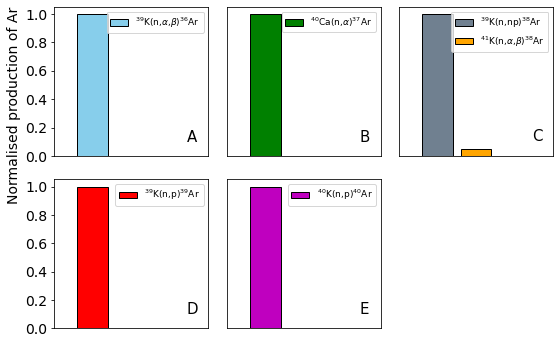

In [127]:
fig, ax = plt.subplots(2,3, figsize = (8,5))

ax[1,2].remove()

"""
36Ar
"""
ax[0,0].bar(1, cl36_k.shape[0]/cl36_k.shape[0], 
            label = r'$^{39}$K(n,$\alpha$,$\beta$)$^{36}$Ar', 
           color = 'skyblue', edgecolor = 'k')

ax[0,0].set_xlim(0,4)
ax[0,0].set_xticks([])
ax[0,0].legend(fontsize= 9, frameon = True)
ax[0,0].locator_params(axis = 'y', nbins = 6)

"""
37Ar
"""
ax[0,1].bar(1,ar37_ca.shape[0]/ar37_ca.shape[0], 
            label = r'$^{40}$Ca(n,$\alpha$)$^{37}$Ar', 
           color = 'green', edgecolor = 'k')

ax[0,1].set_xticks([]);
ax[0,1].set_yticks([])
ax[0,1].set_xlim(0,4)

ax[0,1].legend(fontsize= 9, frameon = True)


"""
38Ar
"""
ax[0,2].bar(1,ar38_k.shape[0]/(ar38_k.shape[0] + cl38_k.shape[0]), 
            label = r'$^{39}$K(n,np)$^{38}$Ar',  
           color = 'slategrey', edgecolor = 'k')
ax[0,2].bar(2,cl38_k.shape[0]/(ar38_k.shape[0] + cl38_k.shape[0]) , 
            label = r'$^{41}$K(n,$\alpha$,$\beta$)$^{38}$Ar',  
           color = 'orange', edgecolor = 'k')

ax[0,2].set_xticks([]);
ax[0,2].set_yticks([])
ax[0,2].set_xlim(0,4)

ax[0,2].legend(fontsize= 9, frameon = True)


"""
39Ar
"""
ax[1,0].bar(1,ar39_k.shape[0]/(ar39_k.shape[0] + ar39_ca.shape[0]), 
            label = r'$^{39}$K(n,p)$^{39}$Ar',  
           color = 'red', edgecolor = 'k')


ax[1,0].set_xticks([]);
#ax[1,0].set_yticks([])
ax[1,0].set_xlim(0,4)
ax[1,0].locator_params(axis = 'y', nbins = 6)

ax[1,0].legend(fontsize= 9, frameon = True)


"""
40Ar
"""
ax[1,1].bar(1,ar40_k.shape[0]/(ar40_k.shape[0]), 
            label = r'$^{40}$K(n,p)$^{40}$Ar',  
           color = 'm', edgecolor = 'k')


ax[1,1].set_xticks([]);
ax[1,1].set_yticks([])
ax[1,1].set_xlim(0,4)

ax[1,1].legend(fontsize= 9, frameon = True)

"""
Add Text
"""
ax[0,0].text(3.45, 0.1, 'A', fontsize = 15)
ax[0,1].text(3.45, 0.1, 'B', fontsize = 15)
ax[0,2].text(3.45, 0.1, 'C', fontsize = 15)
ax[1,0].text(3.45, 0.1, 'D', fontsize = 15)
ax[1,1].text(3.45, 0.1, 'E', fontsize = 15)

ax[0,0].set_ylabel('Normalised production of Ar', loc = 'top')

plt.tight_layout()
